* There is a gap between numerial and symbolic quantum computation
* Quirk is actually not that intuitive. You need to be familiar with it since itreally doesn't have a one-to-one correspondence with textbook algorithm 



Questions:
* Are there measurement gates in Sympy?
    - Yes
* How does one perfom parametrized gates?
    - Started manually building Paramterized gates. Next step is to incorporate it into the states function
* How do you write braket-notation as input on Jupyter?

* How is this different from the Wolfram quantum computing framework?
    - The input is similar to what you see in papers and quantum algorithms
* How does this differ from the Quantum add-on for the mathematica package?
    - That package is not maintained



$\begin{align} \mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^n a_i b_i. \end{align}$

In [1]:
import sympy
import symboliq
from sympy import sqrt
from sympy import *
init_printing()
from sympy.physics.quantum.gate import HadamardGate
from IPython.display import display
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.qapply import qapply
from sympy.physics.quantum.qubit import Qubit, measure_all, measure_all_oneshot
from sympy.physics.quantum.gate import CNOT, H, SWAP, CGate, S, T, X,  OneQubitGate
from sympy.physics.quantum.operator import (UnitaryOperator, Operator,
                                            HermitianOperator)
from sympy.physics.quantum.matrixcache import matrix_cache, sqrt2_inv 
from sympy.physics.quantum.circuitplot import labeller, render_label, Mz, CreateOneQubitGate, CreateCGate, CircuitPlot

In [2]:
qapply(HadamardGate(0)*Qubit('1'))
# Hadamard on bell state, applied on 2 qubits.
psi = 1/sqrt(2)*(Qubit('00')+Qubit('11'))
qapply(HadamardGate(0)*HadamardGate(1)*psi)

√2⋅❘00⟩   √2⋅❘11⟩
─────── + ───────
   2         2   

In [2]:
# Hadamard on bell state, applied on 2 qubits.
psi = Qubit('00')
gate = symboliq.gates.RXGate(0)
gate.symbol = sympy.Symbol('θ')
qapply(gate*psi)

       ⎛θ⎞           ⎛θ⎞     
- ⅈ⋅sin⎜─⎟⋅❘01⟩ + cos⎜─⎟⋅❘00⟩
       ⎝2⎠           ⎝2⎠     

In [3]:
psi

√2⋅(❘00⟩ + ❘11⟩)
────────────────
       2        

In [4]:
Qubit(0)

❘0⟩

In [5]:
Qubit(0) + Qubit(1)

❘0⟩ + ❘1⟩

In [6]:
(1/sqrt(2)*Qubit(0))**2 + 1/sqrt(2)*Qubit(1)

   2         
❘0⟩    √2⋅❘1⟩
──── + ──────
 2       2   

In [7]:

c = CircuitPlot(CNOT(1,0)*H(1),2,labels=labeller(2))

ImportError: numpy or matplotlib not available.

In [8]:
# Intial state
psi = Qubit(0,0)
psi

❘00⟩

In [60]:
# After 1st hadamard
psi = qapply(HadamardGate(0)*psi)
psi

sqrt(2)*|00>/2 + sqrt(2)*|01>/2

In [61]:
# After CNOT
psi = qapply(CNOT(0,1)* psi)
psi

sqrt(2)*|00>/2 + sqrt(2)*|11>/2

In [62]:
# Apply 2nd Hadamard
psi = qapply(H(0)*psi)
psi

|00>/2 + |01>/2 + |10>/2 - |11>/2

In [63]:
# Probability results given the outcomes
measure_all(psi)

[(|00>, 1/4), (|01>, 1/4), (|10>, 1/4), (|11>, 1/4)]

In [55]:
measure_all_oneshot(psi)

|00>

In [24]:
from sympy.physics.quantum.qasm import Qasm

In [28]:
q = Qasm('qubit q0', 'qubit q1', 'h q0', 'cnot q1,q0')

In [29]:
q.get_circuit()

CNOT(0,1)*H(1)

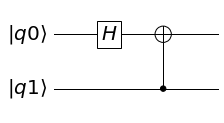

In [45]:
q.plot()

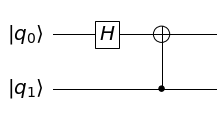

In [30]:
c = CircuitPlot(q.get_circuit(),2,labels=labeller(2))

In [117]:
def steps(circuit):
    psi = Qubit(0,0)
    steps = [psi]
    for moment in circuit:
            for op in moment:
                if op.gate == cirq.X:
                    psi = qapply(X(op.qubits[0].x)*psi)
                    steps.append(psi)
                elif op.gate == cirq.H:
                    psi = qapply(H(op.qubits[0].x)*psi)
                    steps.append(psi)
                elif op.gate == cirq.CNOT:
                    psi = qapply(CNOT(op.qubits[0].x, op.qubits[1].x)*psi)
                    steps.append(psi)
                elif isinstance(op.gate, cirq.MeasurementGate):
                    psi = measure_all_oneshot(psi)
                    steps.append(psi)
                else:
                    raise ValueError("Not implemented")
    return [psi, steps]

In [120]:
qubits = cirq.LineQubit.range(3)

circuit = cirq.Circuit(
    cirq.H(qubits[0]),  
    cirq.CNOT(qubits[0], qubits[1]),
    cirq.H(qubits[0]),
    cirq.measure(qubits[0])
)
print("Circuit:")
ret = steps(circuit)

steps_ret = ret[1]

for step in steps_ret:
    display(step)

Circuit:


|00>

sqrt(2)*|00>/2 + sqrt(2)*|01>/2

sqrt(2)*|00>/2 + sqrt(2)*|11>/2

|00>/2 + |01>/2 + |10>/2 - |11>/2

|11>

In [29]:
_normalized = True
matrix_cache.cache_matrix('H2', sqrt2_inv*Matrix([[sympy.exp(-1j * x/2), 1], [1, -1]]))
class RYGate(HermitianOperator, OneQubitGate):
    """The single qubit Hadamard gate.
    Parameters
    ----------
    target : int
        The target qubit this gate will apply to.
    Examples
    ========
    >>> from sympy import sqrt
    >>> from sympy.physics.quantum.qubit import Qubit
    >>> from sympy.physics.quantum.gate import HadamardGate
    >>> from sympy.physics.quantum.qapply import qapply
    >>> qapply(HadamardGate(0)*Qubit('1'))
    sqrt(2)*|0>/2 - sqrt(2)*|1>/2
    >>> # Hadamard on bell state, applied on 2 qubits.
    >>> psi = 1/sqrt(2)*(Qubit('00')+Qubit('11'))
    >>> qapply(HadamardGate(0)*HadamardGate(1)*psi)
    sqrt(2)*|00>/2 + sqrt(2)*|11>/2
    """
    gate_name = 'H'
    gate_name_latex = 'H'

    def get_target_matrix(self, format='sympy'):
        if _normalized:
            return matrix_cache.get_matrix('H2', format)
        else:
            return matrix_cache.get_matrix('Hsqrt2', format)

    def _eval_commutator_XGate(self, other, **hints):
        return I*sqrt(2)*YGate(self.targets[0])

    def _eval_commutator_YGate(self, other, **hints):
        return I*sqrt(2)*(ZGate(self.targets[0]) - XGate(self.targets[0]))

    def _eval_commutator_ZGate(self, other, **hints):
        return -I*sqrt(2)*YGate(self.targets[0])

    def _eval_anticommutator_XGate(self, other, **hints):
        return sqrt(2)*IdentityGate(self.targets[0])

    def _eval_anticommutator_YGate(self, other, **hints):
        return _S.Zero

    def _eval_anticommutator_ZGate(self, other, **hints):
        return sqrt(2)*IdentityGate(self.targets[0])

TypeError: can't convert expression to float

In [30]:
psi = Qubit(0,0)
qapply(RYGate(0)*psi)

In [15]:
x, y, z = symbols("x y z")
expr = cos(x) + 1

In [16]:
expr

In [28]:
sympy.exp(-1j * x/2)

In [48]:
psi0_matrix = Matrix([[1], [0]])
psi0_matrix

⎡1⎤
⎢ ⎥
⎣0⎦

In [53]:
psi00_matrix = Matrix([[1], [0], [0], [0]])
psi00_matrix

⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [42]:
rz = Matrix([[sympy.exp(-1j * x/2), 0], [0, sympy.exp(1j * x/2)]]) 
rz

⎡ -0.5⋅ⅈ⋅x          ⎤
⎢ℯ             0    ⎥
⎢                   ⎥
⎢            0.5⋅ⅈ⋅x⎥
⎣    0      ℯ       ⎦

In [44]:
ry = Matrix([[sympy.cos(x/2), -1*sympy.sin(x/2)], [sympy.sin(x/2), sympy.cos(x/2)]]) 
ry

⎡   ⎛x⎞      ⎛x⎞⎤
⎢cos⎜─⎟  -sin⎜─⎟⎥
⎢   ⎝2⎠      ⎝2⎠⎥
⎢               ⎥
⎢   ⎛x⎞     ⎛x⎞ ⎥
⎢sin⎜─⎟  cos⎜─⎟ ⎥
⎣   ⎝2⎠     ⎝2⎠ ⎦

In [61]:
i = Matrix([[1, 0], [0,1]]) 

In [131]:
ry01 = TensorProduct(ry, i)

In [132]:
ry01

⎡   ⎛x⎞              ⎛x⎞         ⎤
⎢cos⎜─⎟    0     -sin⎜─⎟     0   ⎥
⎢   ⎝2⎠              ⎝2⎠         ⎥
⎢                                ⎥
⎢           ⎛x⎞               ⎛x⎞⎥
⎢  0     cos⎜─⎟     0     -sin⎜─⎟⎥
⎢           ⎝2⎠               ⎝2⎠⎥
⎢                                ⎥
⎢   ⎛x⎞             ⎛x⎞          ⎥
⎢sin⎜─⎟    0     cos⎜─⎟      0   ⎥
⎢   ⎝2⎠             ⎝2⎠          ⎥
⎢                                ⎥
⎢           ⎛x⎞              ⎛x⎞ ⎥
⎢  0     sin⎜─⎟     0     cos⎜─⎟ ⎥
⎣           ⎝2⎠              ⎝2⎠ ⎦

In [133]:
rz * psi0_matrix

⎡ -0.5⋅ⅈ⋅x⎤
⎢ℯ        ⎥
⎢         ⎥
⎣    0    ⎦

In [134]:
CNOT(0, 1).get_target_matrix()

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [135]:
cnot01 = Matrix([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])
cnot01

⎡1  0  0  0⎤
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  1  0  0⎦

In [136]:
ry * psi0_matrix

⎡   ⎛x⎞⎤
⎢cos⎜─⎟⎥
⎢   ⎝2⎠⎥
⎢      ⎥
⎢   ⎛x⎞⎥
⎢sin⎜─⎟⎥
⎣   ⎝2⎠⎦

In [137]:
ry01 * psi00_matrix

⎡   ⎛x⎞⎤
⎢cos⎜─⎟⎥
⎢   ⎝2⎠⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢   ⎛x⎞⎥
⎢sin⎜─⎟⎥
⎢   ⎝2⎠⎥
⎢      ⎥
⎣  0   ⎦

In [138]:
cnot01 * ry01 * psi00_matrix

⎡   ⎛x⎞⎤
⎢cos⎜─⎟⎥
⎢   ⎝2⎠⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢   ⎛x⎞⎥
⎢sin⎜─⎟⎥
⎢   ⎝2⎠⎥
⎢      ⎥
⎣  0   ⎦

In [139]:
psi = ry01 * cnot01 * ry01 * psi00_matrix
psi

⎡     2⎛x⎞      2⎛x⎞⎤
⎢- sin ⎜─⎟ + cos ⎜─⎟⎥
⎢      ⎝2⎠       ⎝2⎠⎥
⎢                   ⎥
⎢         0         ⎥
⎢                   ⎥
⎢       ⎛x⎞    ⎛x⎞  ⎥
⎢  2⋅sin⎜─⎟⋅cos⎜─⎟  ⎥
⎢       ⎝2⎠    ⎝2⎠  ⎥
⎢                   ⎥
⎣         0         ⎦

In [112]:
psi.subs(x, pi)

⎡0 ⎤
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣0 ⎦

In [51]:
CNOT(0, 1).get_target_matrix()

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [89]:
((cos(x/2)) ** 2) ** 2

In [90]:
((sin(x/2)) * cos(x/2)) ** 2

$$\alpha$$

$$\displaystyle {\left|0\right\rangle } + {\left|1\right\rangle }$$

|0⟩ + |1⟩

In [144]:
Qubit(0) + Qubit(1)

In [9]:
from sympy.abc import i, k, m, n, x
from sympy.physics.quantum import Ket
Ket(x)

❘x⟩

In [11]:


from sympy import Sum, factorial, oo, IndexedBase, Function

had = Sum(Ket(x), (x, 0, 2**n -1))

In [15]:
had

 n        
2  - 1    
 ___      
 ╲        
  ╲       
  ╱    ❘x⟩
 ╱        
 ‾‾‾      
x = 0     

In [17]:
had_1 = had.subs(n, 2)

In [18]:
had_1.doit()

4⋅❘x⟩

In [33]:
f = Function('ket')
hadamard_transform = 1/sqrt(2)*Sum(f(n), (n, 0, 2**n-1))
hadamard_transform

    n           
   2  - 1       
    ___         
    ╲           
     ╲          
√2⋅  ╱    ket(n)
    ╱           
    ‾‾‾         
   n = 0        
────────────────
       2        

In [34]:
hadamard_transform.doit()

    n           
   2  - 1       
    ___         
    ╲           
     ╲          
√2⋅  ╱    ket(n)
    ╱           
    ‾‾‾         
   n = 0        
────────────────
       2        

In [ ]:
from sympy.physics.quantum import TensorProduct

In [36]:
g = Function('g')

In [43]:
def f(x):
    if x == 0:
        return 0
    else:
        return x + 1

In [59]:
from sympy import pi, Integer

class f(Function):
   @classmethod
   def eval(cls, x):
        if x == 0:
            return 0
        else:
            return 1

In [62]:
f(0) != f(1)


True

In [63]:
class g(Function):
   @classmethod
   def eval(cls, x):
            return 0

In [64]:
g(0) == g(1)

True

In [66]:
res = 1/sqrt(2)*(TensorProduct(Ket(0), Ket(f(0))) + TensorProduct(Ket(1), Ket(f(1)))) 
res

√2⋅(❘0⟩⨂ ❘0⟩ + ❘1⟩⨂ ❘1⟩)
────────────────────────
           2            

In [65]:
TensorProduct(Ket(0), Ket(g(0))) + TensorProduct(Ket(1), Ket(g(1)))

❘0⟩⨂ ❘0⟩ + ❘1⟩⨂ ❘0⟩

In [50]:
res.subs(x, 0)

❘0⟩⨂ ❘0⟩ + ❘1⟩⨂ ❘0⟩

In [2]:
alpha, beta = symbols('alpha beta', real=True)

In [3]:
psi = alpha*Qubit('00') + beta*Qubit('11'); psi

α⋅❘00⟩ + β⋅❘11⟩

In [5]:
from sympy.physics.quantum import *
Dagger(psi)

α⋅⟨00❘ + β⋅⟨11❘

In [6]:
represent(psi)

⎡α⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣β⎦